<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Halo Rizdha**
    
**Greetings from Chamdani**

Terima kasih telah mengirimkan project kamu dengan ini kamu sudah memulai sebuah langkah yang luar biasa saat ini. Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus ya :).**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>

<div class="alert alert-info">
<b>Chamdani's info v.1</b> <a class="tocSkip"></a>

Catatan umum:
* Fungsi `print` tidak diperlukan untuk mencetak suatu nilai
* Lebih baik tulis kode pada bagian akhir cell code untuk menampilkan output tanpa `print`
* Perintah soal yang ada dalam tanda kurung siku `[...]` sebaiknya dihilangkan
* Sangat disarankan untuk menggunakan cell markdown untuk memberikan deskripsi temuan atau kesimpulan.
* Tidak disarankan menggunakan cell code untuk memberikan penjelasan / deskripsi.
* Untuk menghindari galat pada notebook project kamu. Batasi jumlah output yang dikeluarkan setiap kode dengan batas max 10 baris data.

</div>

<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

**INGATLAH** 
* Project kamu tidak akan bisa diterima bila kamu masih memiliki feedback berwarna merah. 
* Kamu hanya memiliki 3 kali kesempatan iterasi submission disetiap projectnya 
* Jika merasa kesulitan kamu dapat menuliskan responmu atas feedback saya menggunakan blok markdown warna biru dan kamu bisa mengirimkan project pada submission selanjutnya untuk mendapatkan jawaban / respon dari saya segera yaa

Kamu dapat menjawab saya dengan menggunakan blok berwarna biru seperti ini

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-warning">
    
# General feedback v.1 [Minor Improvement Needed]

Terima kasih banyak telah mengirimkan proyek Anda! 

Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Namun saya telah menemukan beberapa hal kecil yang bisa menjadi saran perbaikan agar proyek kamu menjadi lebih baik lagi.

Saya telah meninggalkan komentar yang dapat membantu Anda dalam hal tersebut. Hal ini tidak berarti bahwa Anda telah melakukan sesuatu yang salah. Hal ini hanya berisi beberapa saran tentang bagaimana pekerjaan Anda dapat kembangkan lebih lanjut. Anda masih memiliki kesempatan untuk memperbaikinya dan jangan lupa untuk kembali kepada saya setelah perbaikan anda selesai.

<br>
Jika ada sesuatu yang membuat Anda bingung atau tidak mengerti. Tolong, jangan ragu untuk menghubungi tim mentor atau instruktur kamu yaa

kamu juga bisa menghubungi saya melalui reply feedback di notebook ini yaa

**TETAP SEMANGAT!!**
    
</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-success">
    
# General feedback v.2 *Project Accepted*

Terima kasih banyak telah mengirimkan proyek Anda! 
<br>
    
Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Semoga apa yang kamu pelajari dalam project ini dapat membantu meningkatkan kemampuanmu. Pertahankan apa yang sudah bagus, dan tingkatkan apa yang menurutmu masih perlu ditingkatkan. Semoga berhasil pada project selanjutnya yaa :)

**TETAP SEMANGAT!!**
    
</div>

# Keterangan Tugas

Film Junky Union, sebuah komunitas baru bagi penggemar film klasik sedang mengembangkan sistem untuk memfilter dan mengategorikan ulasan film. Misi utamanya adalah melatih model agar bisa mendeteksi ulasan negatif secara otomatis. Kita akan menggunakan *dataset* ulasan film IMBD dengan pelabelan polaritas untuk membuat sebuah model yang bisa mengklasifikasikan ulasan positif dan negatif. Model ini setidaknya harus memiliki skor F1 sebesar 0,85.

Berikut adalah deskripsi untuk kolom yang dipilih:

- `review`: teks ulasan
- `pos`: target, '0' untuk negatif dan '1' untuk positif
- `ds_part`: 'train'/'test' untuk bagian train/test dari dataset

## Inisialisasi

In [1]:
!pip install transformers

In [2]:
import math

import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# baris berikutnya menyediakan grafik dengan kualitas yang lebih baik di layar HiDPI 

%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [4]:
# ini untuk menggunakan progress_apply, baca lebih lanjut di https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Memuat data

In [5]:
try:
    df_reviews = pd.read_csv('imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
except:
    df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [6]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [8]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


In [9]:
# Checking for duplicates
df_reviews.duplicated().sum()

0

Berdasarkan pengamatan dasar dari memuat dataset, kita mengetahui bahwa jumlah data sebanyak 47331 baris dan 17 kolom. Dataset ini memiliki beberapa nilai yang hilang pada kolom average_rating dan votes, kita tidak akan memproses nilai yang hilang dikarenakan hanya beberapa baris yang hilang dan bukan kolom utama untuk memproses natural language processing (NLP). Dataset juga tidak memiliki duplikasi data sehingga bisa kita proses lebih lanjut.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## EDA

Periksa jumlah film dan ulasan selama beberapa tahun.

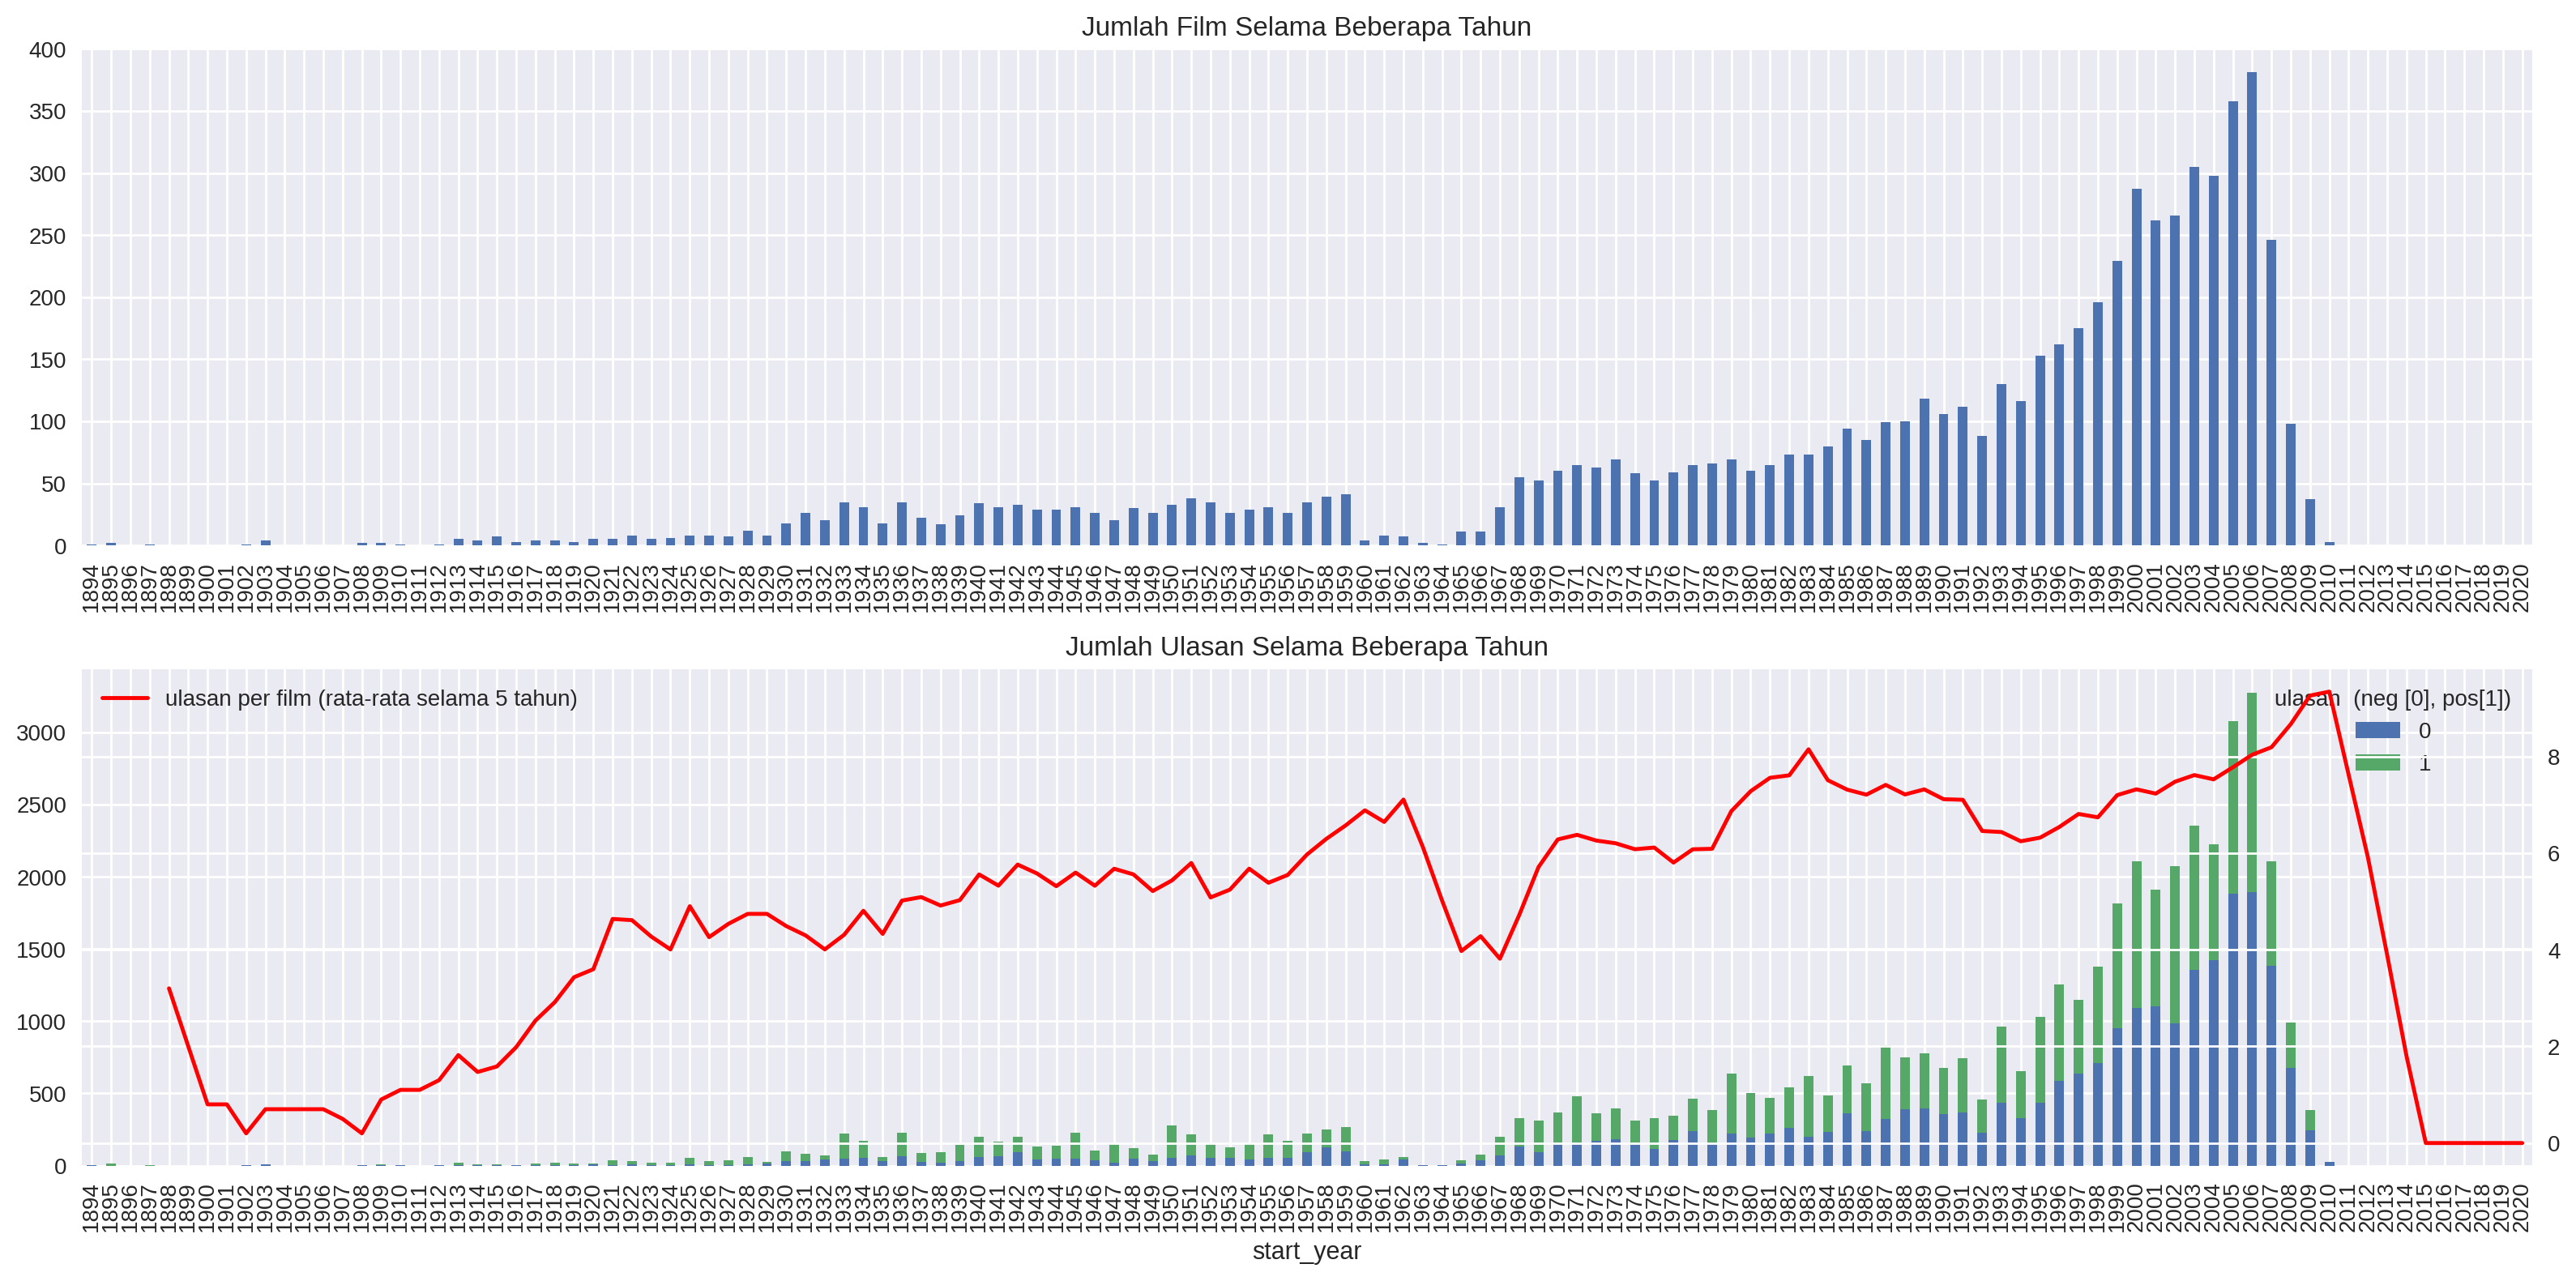

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]
dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates()['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Jumlah Film Selama Beberapa Tahun')

ax = axs[1]
dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2.rename_axis('ulasan  (neg [0], pos[1])',axis="columns",inplace=True)
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft2.plot(kind='bar', stacked=True, ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='red', label='ulasan per film (rata-rata selama 5 tahun)', ax=axt)
plt.legend(loc="upper left")

ax.set_title('Jumlah Ulasan Selama Beberapa Tahun') 
fig.tight_layout()

Dari grafik diatas, dapa dilihat bahwa jumlah dari film dan jumlah dari review film bertambah setiap tahunnya, jumlah review postif dan negatif terlihat mirip

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

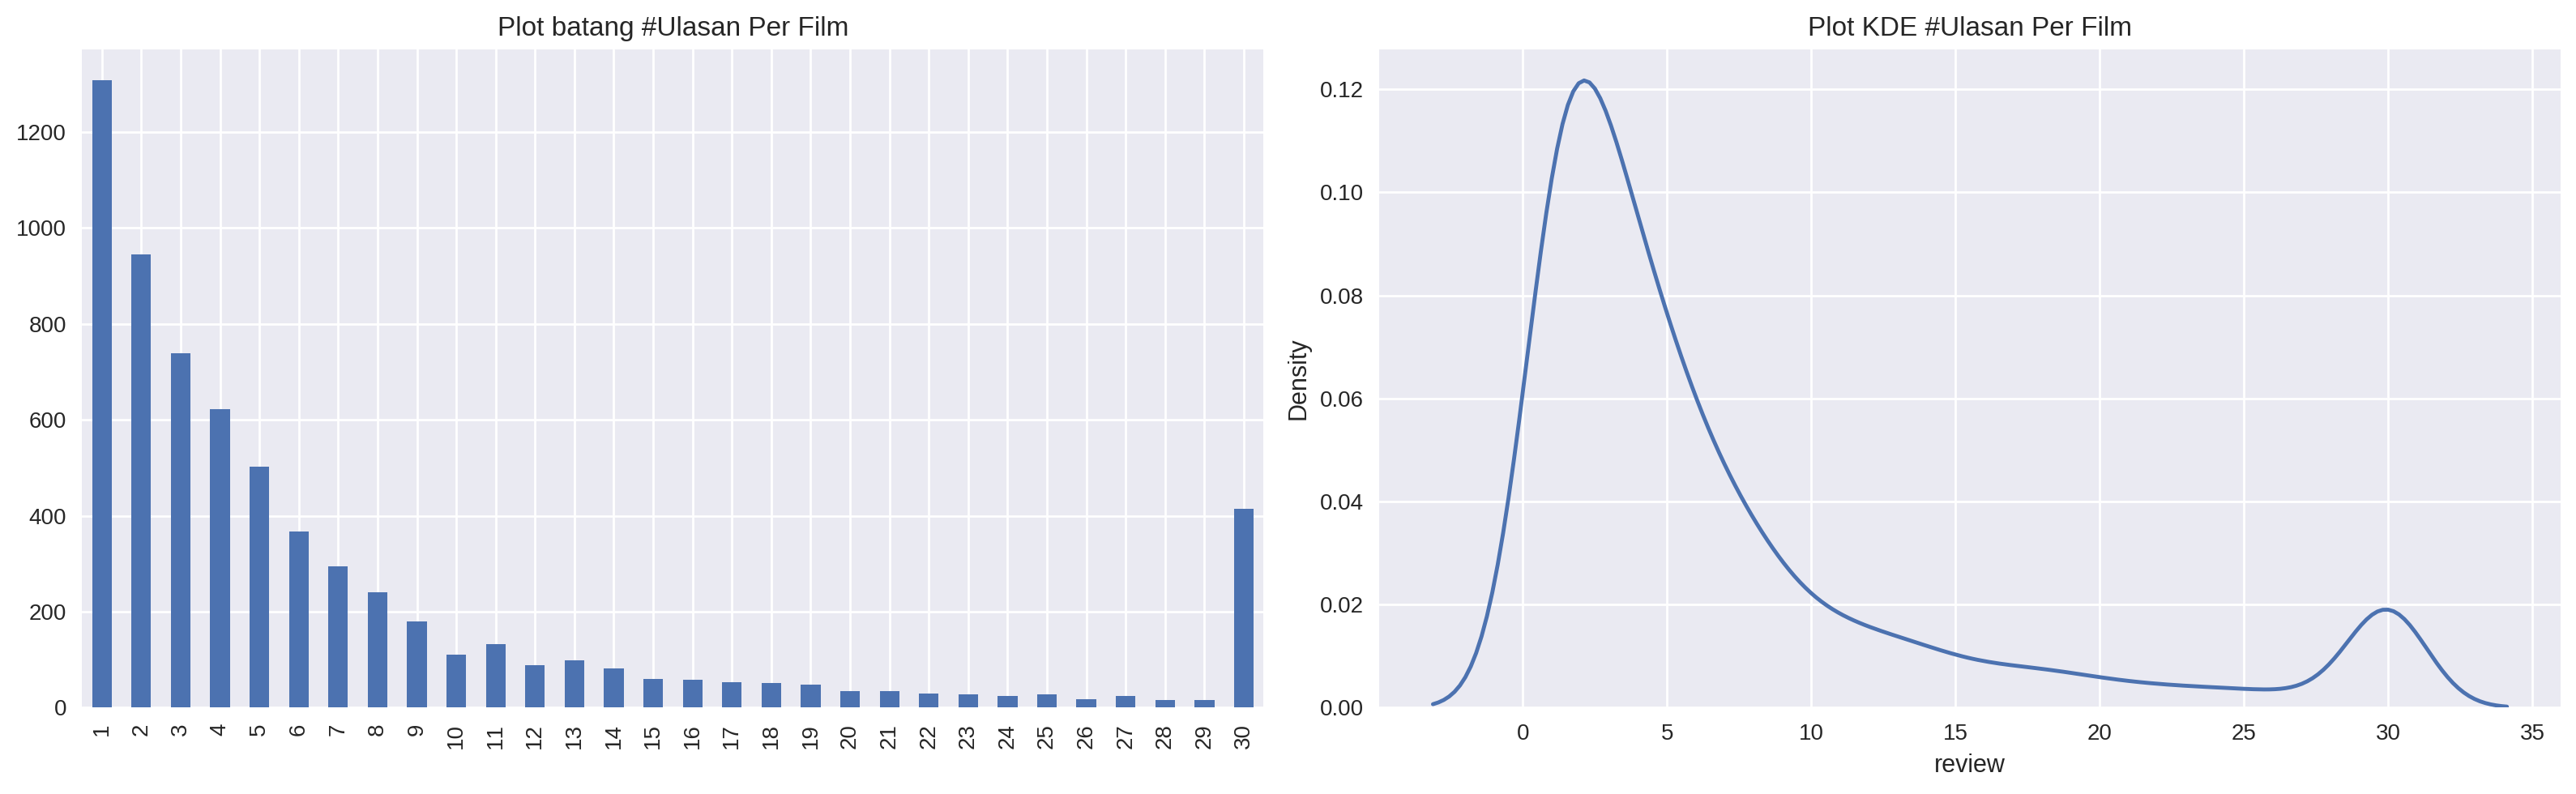

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Plot batang #Ulasan Per Film')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Plot KDE #Ulasan Per Film') 

fig.tight_layout()

Terlihat sebagian besar film hanya memiliki 1 review, dan jumlahnya semakin berkurang seiring dengan semakin banyaknya review yang diberikan. Kita juga melihat ada 30 review yang cukup banyak untuk film-film yang diulas.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [12]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

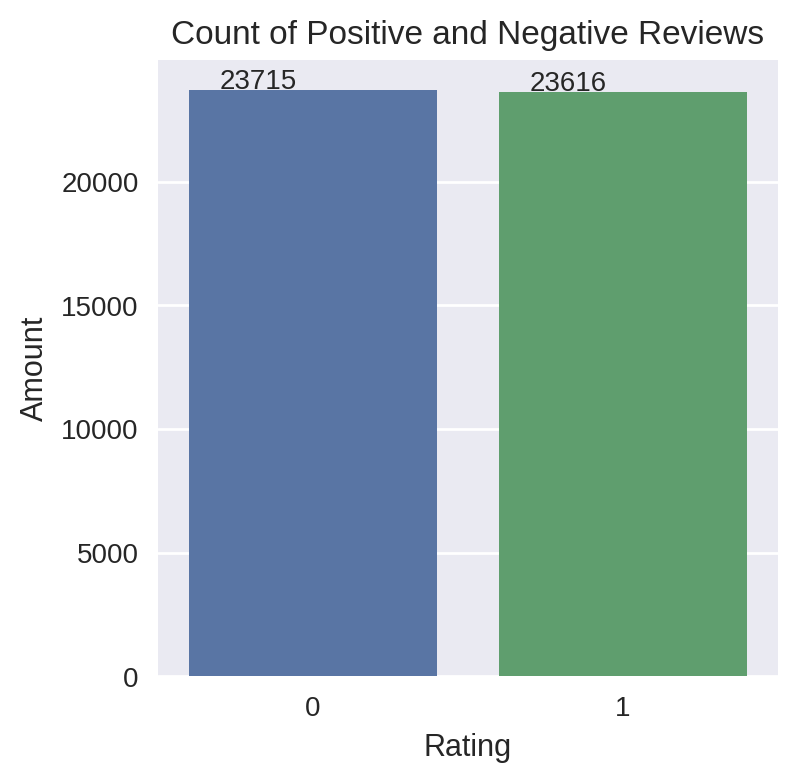

In [13]:
# Creating plot 
plt.figure(figsize=(4,4))
splot = sns.countplot(x='pos', data=df_reviews, order=df_reviews['pos'].value_counts().index)
plt.xlabel('Rating')
plt.ylabel('Amount')
plt.title('Count of Positive and Negative Reviews')
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

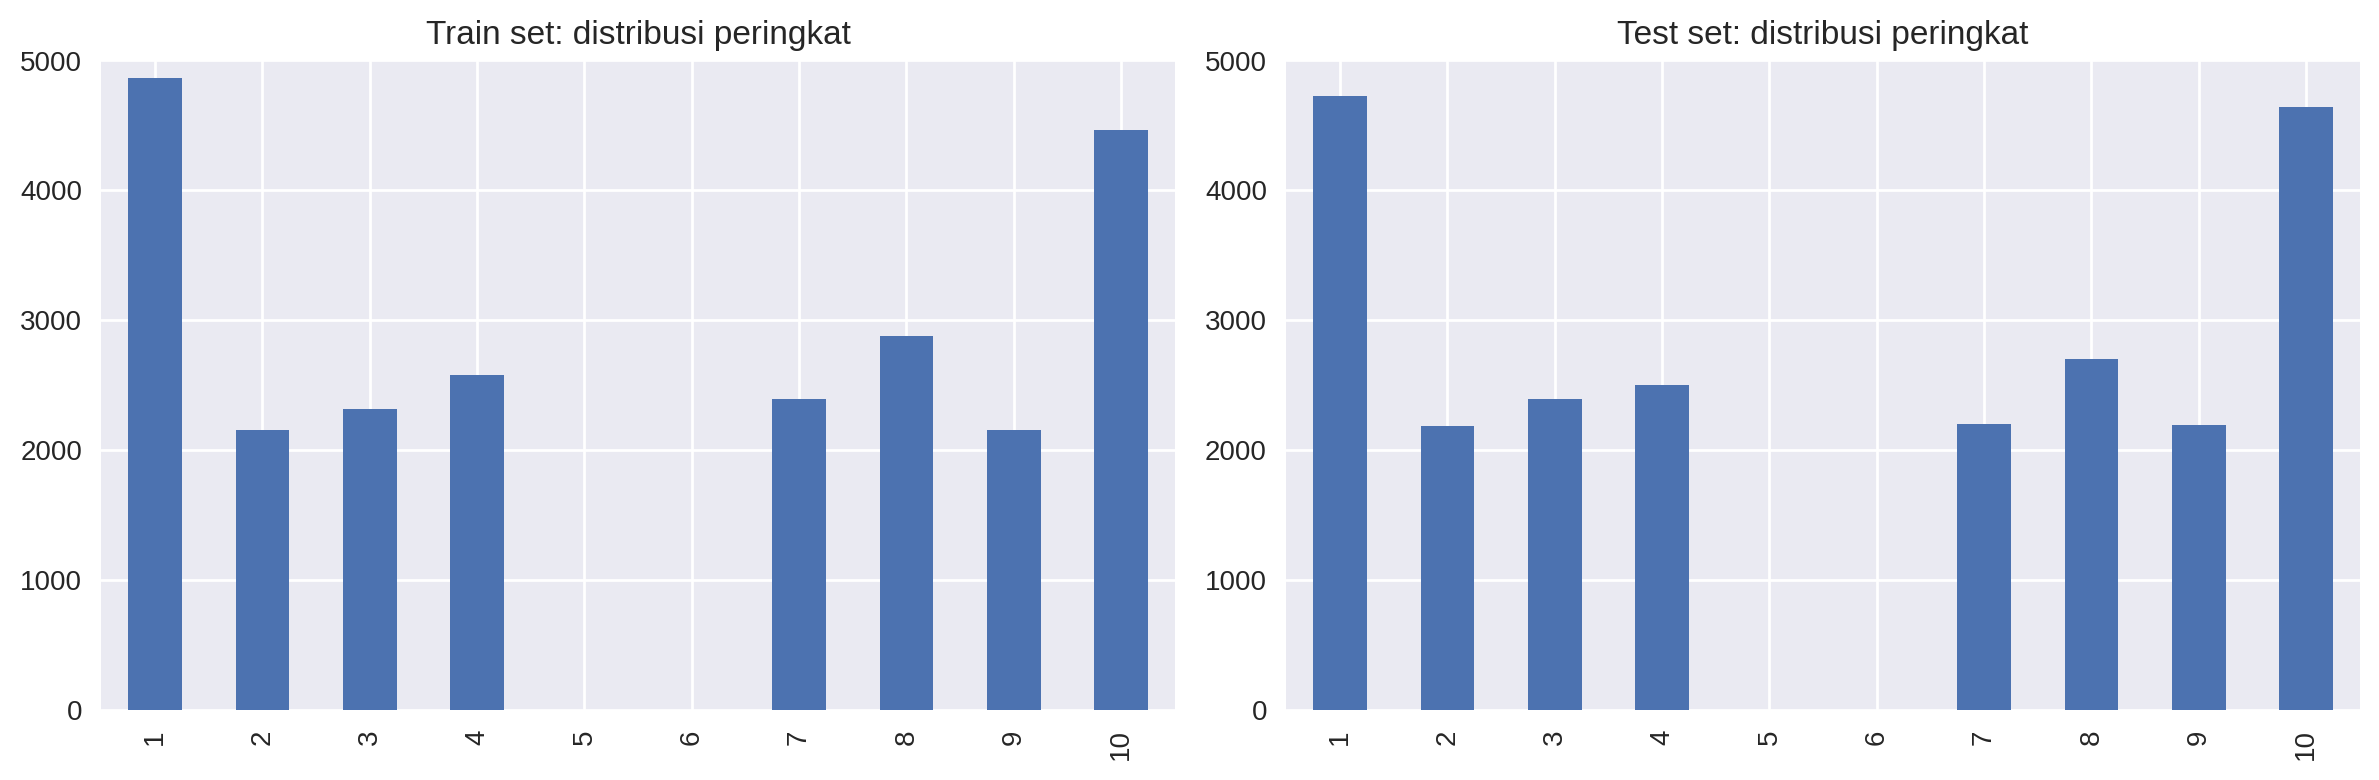

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Train set: distribusi peringkat')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Test set: distribusi peringkat')

fig.tight_layout()

Rating film pada train set dan test set terlihat mirip, dimana nilai rating 1 dan 10 adalah yang terbanyak

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

Distribusi ulasan negatif dan positif selama bertahun-tahun untuk dua bagian *dataset*

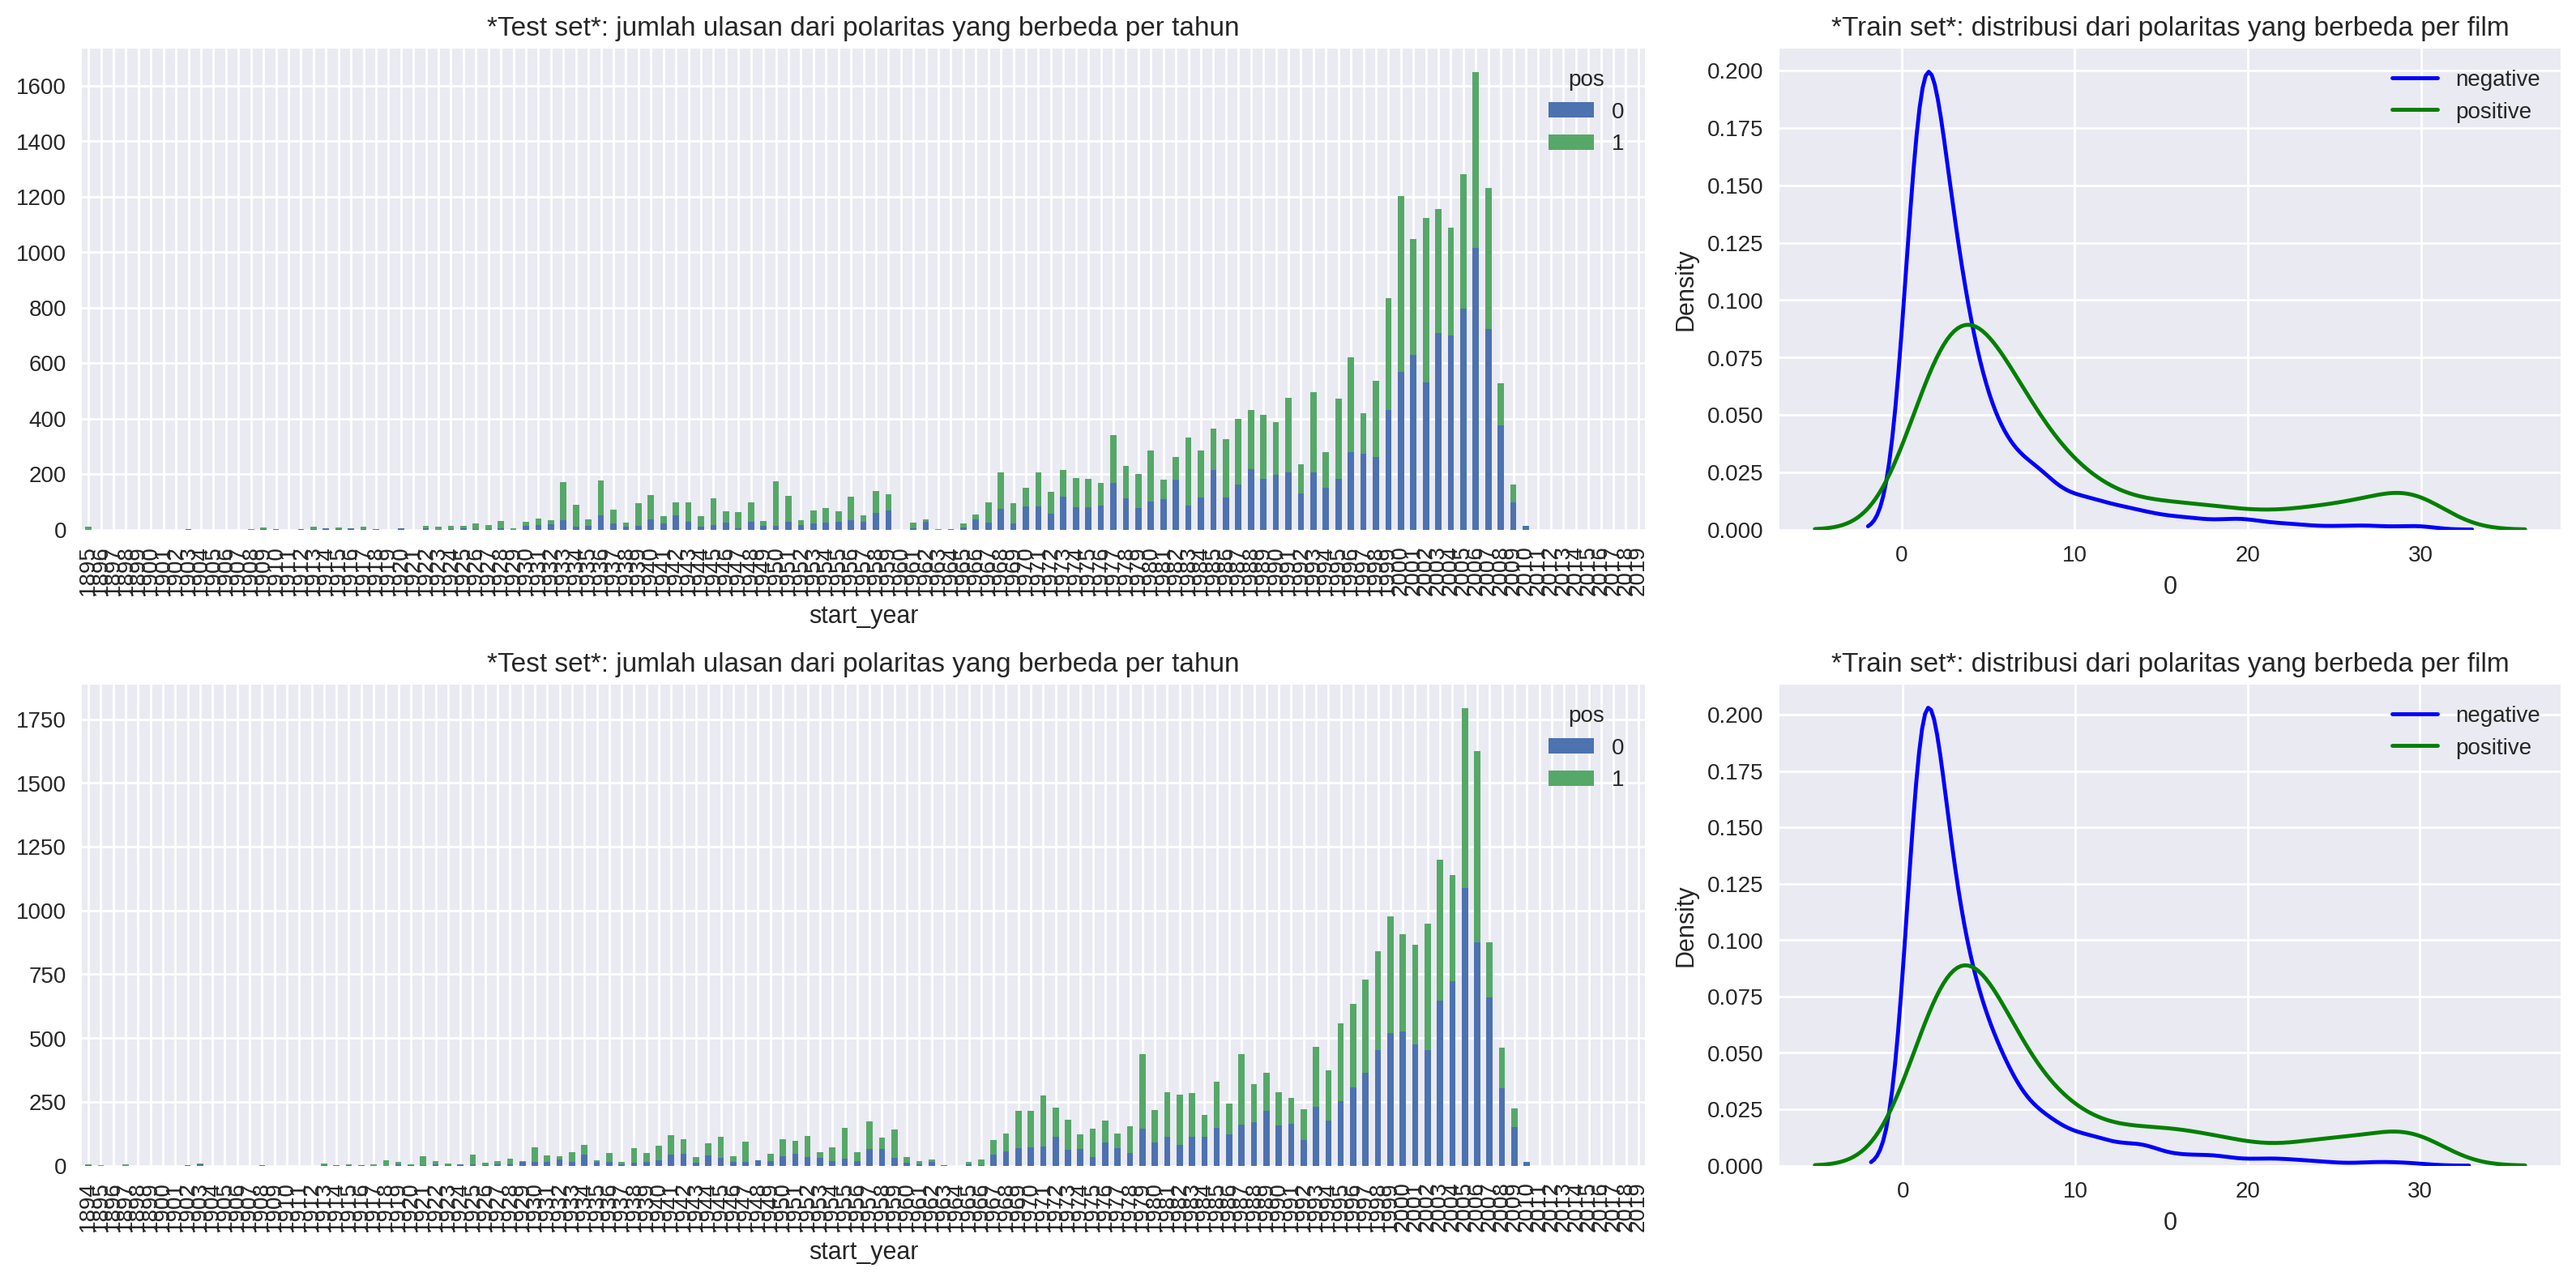

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('*Test set*: jumlah ulasan dari polaritas yang berbeda per tahun')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('*Train set*: distribusi dari polaritas yang berbeda per film')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('*Test set*: jumlah ulasan dari polaritas yang berbeda per tahun')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('*Train set*: distribusi dari polaritas yang berbeda per film')

fig.tight_layout()

Meskipun jumlah review positif dan negatif hampir sama, namun distribusinya berbeda

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Prosedur Evaluasi

Menyusun evaluasi yang dapat digunakan untuk semua model dalam tugas ini secara rutin

In [16]:
# create evaluation metric function

import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Scor F1 
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # set crosses for multiple thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # set crosses for multiple thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # set crosses for multiple thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Normalisasi

Kita menganggap semua model di bawah menerima teks dalam huruf kecil dan tanpa angka, tanda baca, dll.

In [17]:
def clear_text(text):
    text = text.lower()
    pattern = r"[^a-z\s]"
    text = re.sub(pattern, " ", text)
    text = text.split()
    return ' '.join(text)

In [18]:
# substitution - with each matching pattern to be substituted
df_reviews['review_norm'] = df_reviews['review'].apply(clear_text)

In [19]:
df_reviews['review_norm'].sample(1).array

<PandasArray>
['this film reappeared on channel in the s when they did a series of comedies from hollywood in the s and s in fact to the tune of the jolly fat policeman they had a montage of scenes from the films to introduce the series of people laughing including one of gary cooper chortling when watching a film in a movie house a sequence from this film it all begins innocently enough when cooper a millionaire goes into a fancy department store in france to buy pajamas but he only likes to sleep in the tops the clerk tyler brooke insists that he cannot sell half a pair of pajamas as cooper wants claudette colbert hears the argument and offers to help she only likes to sleep in pajama bottoms what if brooke sells them each half brooke has never had such an offer before so he goes to the floor walker rolfe sedan and asks him if this can be done he is disturbed too the request is quite unconventional eventually they contact the store s owner charles halton halton is in bed and gets out

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Baiknya disini kamu membuat fungsi untuk melakukan normalisasi text seperti berikut
    
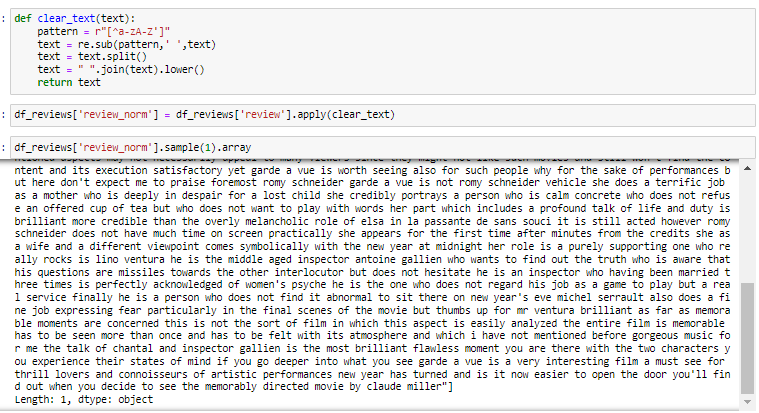

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Pemisahan Train / Test

Untungnya, seluruh *dataset* sudah dibagi menjadi *train/test*. Bendera yang sesuai adalah 'ds_part'.

In [20]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Bekerja dengan Model

### Model 0 - Konstan

Model-0: Model ini menggunakan DummyClassifier dan tanpa pra-pemrosesan dataset

In [21]:
from sklearn.dummy import DummyClassifier

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


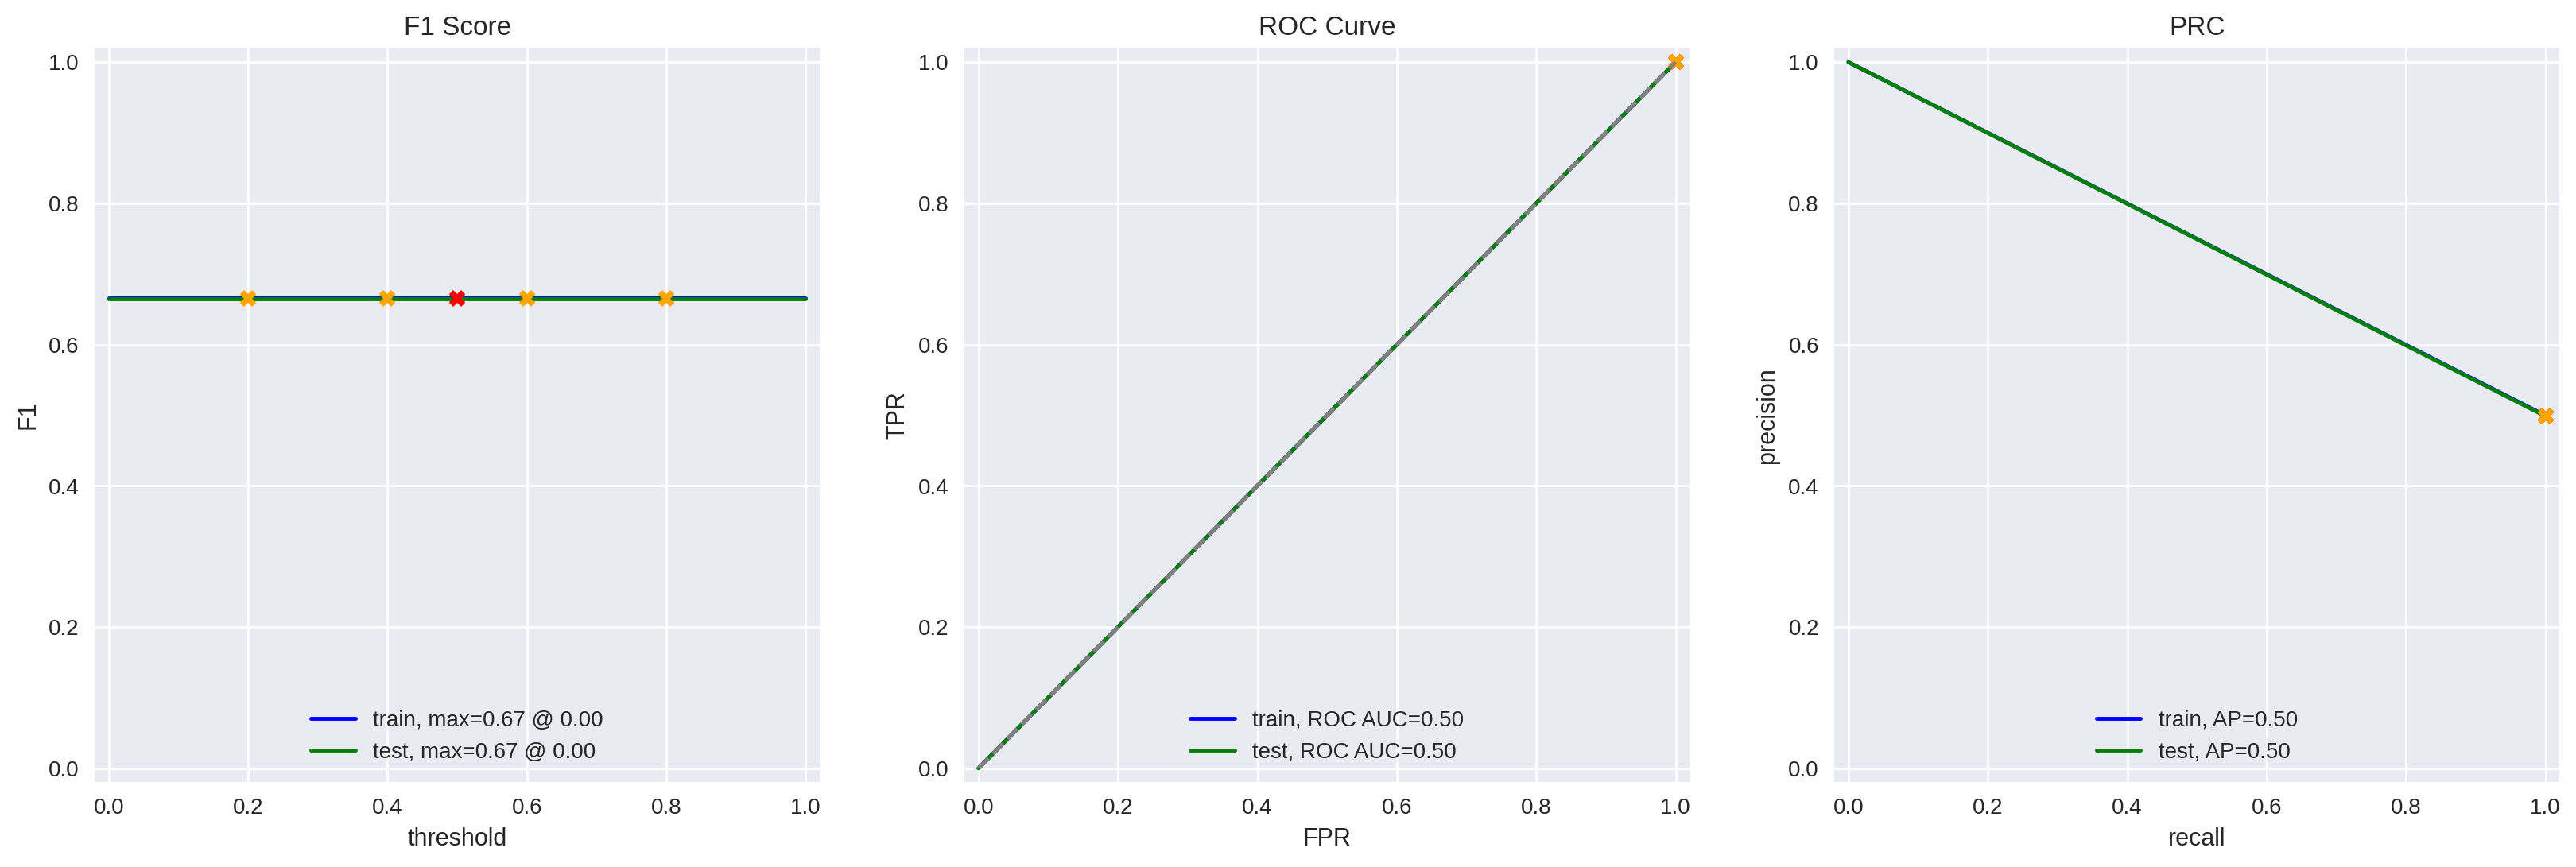

In [22]:
# train the dummy classifier model
dummy_clf = DummyClassifier(strategy='constant', constant=1)
#dummy_clf = DummyClassifier(strategy='most_frequent')

model_0 = dummy_clf.fit(X=df_reviews_train, y=train_target)

evaluate_model(model_0, np.empty(len(train_target)), train_target, np.empty(len(test_target)), test_target)

Kita menggunakan dummy classifier ini sebagai baseline untuk model selanjutnya, pada model ini nilai F1 0.67 sementara pada tugas ini nilai F1 yang ditetapkan sebesar 0.85

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model 1 - NLTK, TF-IDF dan LR

TF-IDF
Model ini bekerja menggunakan teknik pemrosesan kata dari NLTK untuk menghilangkan stopwords dan juga melakukan lematiasi kata. Setelah pemrosesan, dilakukan vektorisasi menggunakan TF-IDF dari modul scikit-learn. Model dari modul yang sama LogisticRegression dilatih dan diuji kemudian dievaluasi.

In [23]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [24]:
# find stop words
tfidf_vectorizer_1 = TfidfVectorizer(stop_words=stopwords.words('english'), lowercase=True)

In [25]:
# Run the fit_transform on the train set function to calculate the TF-IDF for the text corpus
train_features_1 = tfidf_vectorizer_1.fit_transform(df_reviews_train['review_norm'])
print(train_features_1.shape)

# Run the fit_transform on the test set function to calculate the TF-IDF for the text corpus
test_features_1 = tfidf_vectorizer_1.transform(df_reviews_test['review_norm'])
print(test_features_1.shape)

(23796, 71531)
(23535, 71531)


In [26]:
# training the train set with a logistic regression model 
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()

model_1.fit(train_features_1, train_target)

LogisticRegression()

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


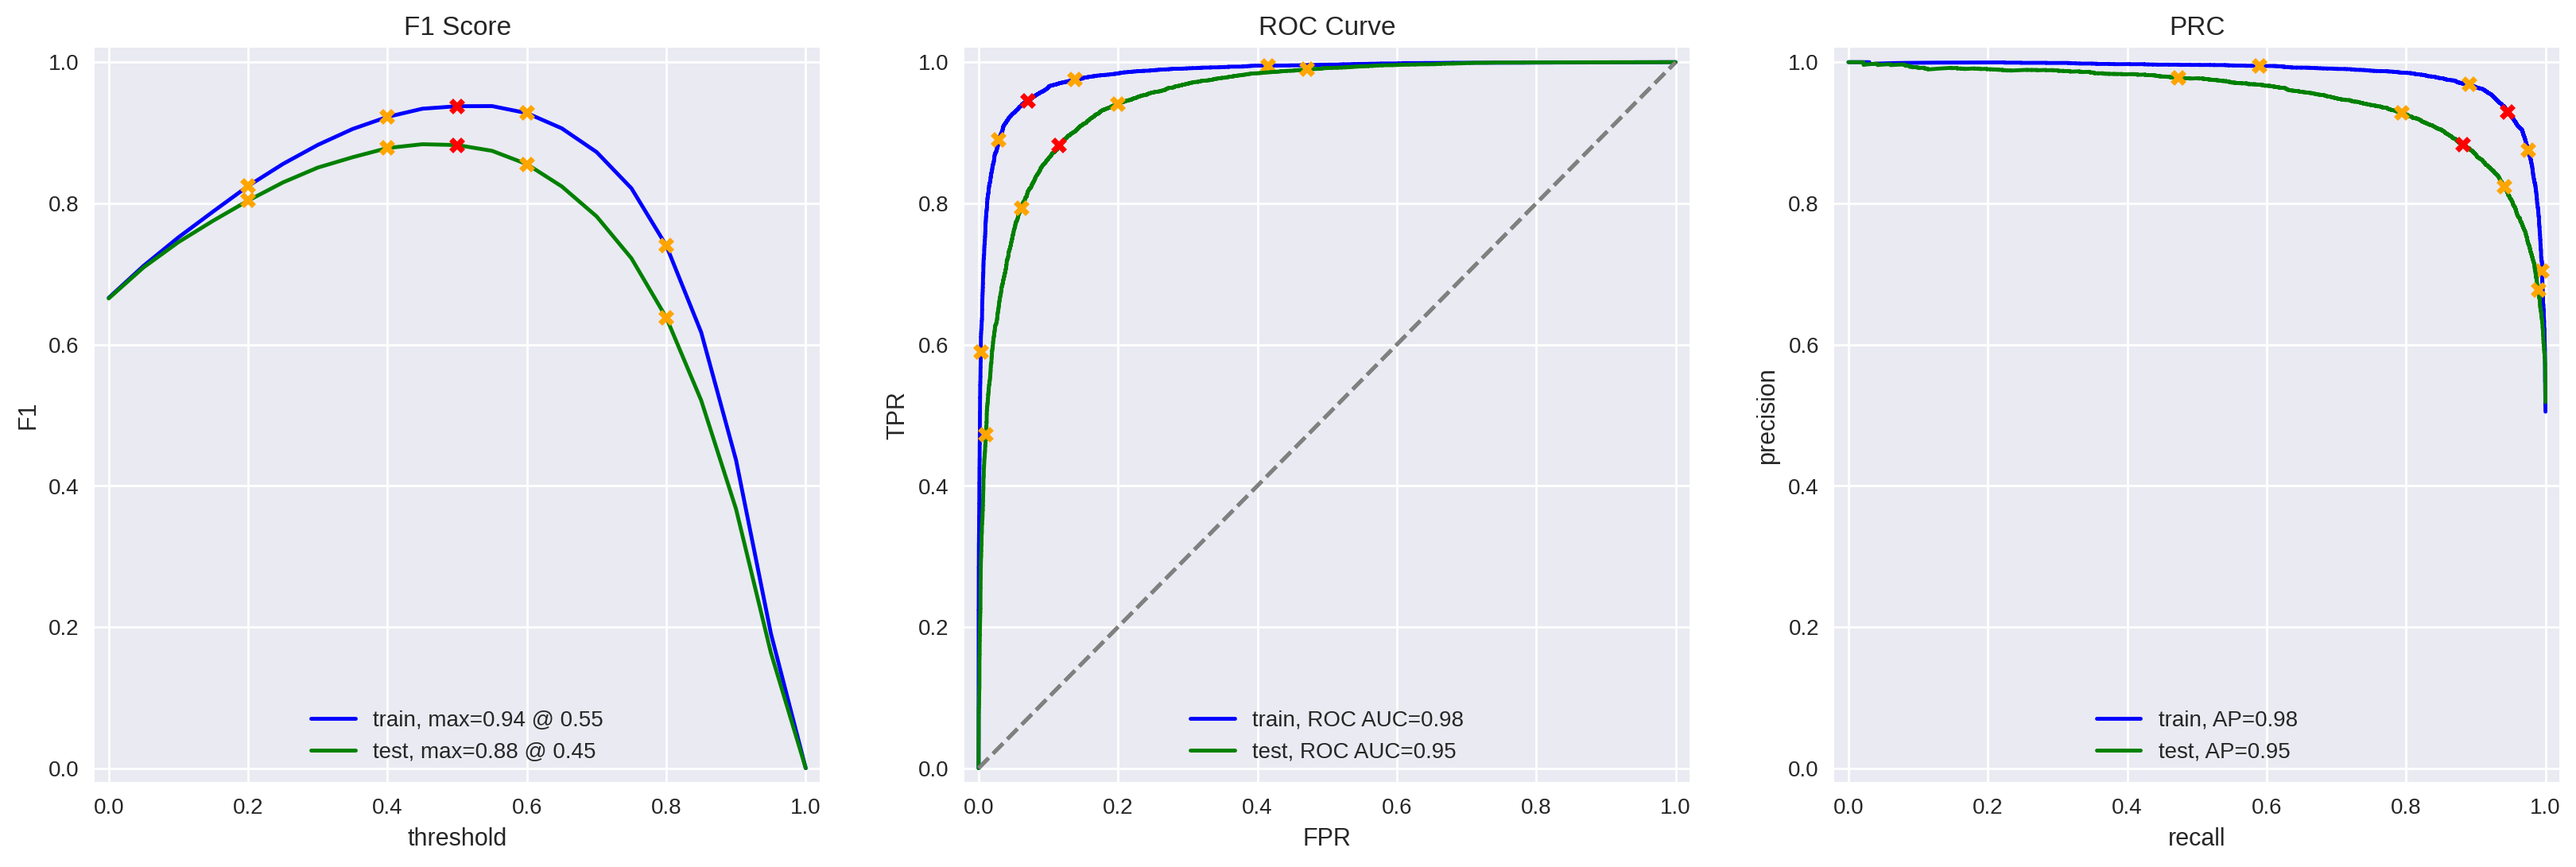

In [27]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

Model Logisticregression dengan NLTK.TF-IDF menghasilkan nilai F1 yang jauh lebih baik dari dummy model, dimana pada test set menghasilkan nilai 0.88 yang mana sudah diatas syarat ketentuan 0.85

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model 2 - spaCy, TF-IDF dan LR

In [28]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [29]:
def text_preprocessing_2(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [ ]:
# split text into tokens on the train set
df_reviews_train['review_tokenized_2'] = df_reviews_train['review_norm'].progress_apply(lambda x: text_preprocessing_2(x))

  0%|          | 0/23796 [00:00<?, ?it/s]

In [ ]:
# split text into tokens on the test set
df_reviews_test['review_tokenized_2'] = df_reviews_test['review_norm'].progress_apply(lambda x: text_preprocessing_2(x))

In [ ]:
# call the function
tfidf_vectorizer_2 = TfidfVectorizer()

In [ ]:
# Run the fit_transform on the train set function to calculate the TF-IDF for the text corpus
train_features_2 = tfidf_vectorizer_2.fit_transform(df_reviews_train['review_tokenized_2'])
print(train_features_2.shape)
# Run the fit_transform on the test set function to calculate the TF-IDF for the text corpus
test_features_2 = tfidf_vectorizer_2.transform(df_reviews_test['review_tokenized_2'])
print(test_features_2.shape)
print()
df_reviews_train['review_norm']

In [ ]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression()

model_2.fit(train_features_2, train_target)

In [ ]:
# perform evaluation matrix on the logistic regression model
evaluate_model(model_2, train_features_2, train_target, test_features_2, test_target)

Bisa kita lihat performa model-2 ini semua skor untuk dataset test berkisar antara 0.88 hingga 0.95 menunjukan performa yang sangat bagus. Berdasarkan grafik, model-2 tidak menunjukan adanya tanda-tanda overfit dikarenakan skor train dan test yang hampir seimbang.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model 3 - spaCy, TF-IDF dan LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
model_3 = LGBMClassifier(learning_rate=.1)

model_3.fit(train_features_2, train_target)

In [ ]:
# perform evaluation matrix on the LGBM model
evaluate_model(model_3, train_features_2, train_target, test_features_2, test_target)

performa model-4 ini semua skor untuk dataset test berkisar antara 0.86 hingga 0.94 menunjukan performa yang sangat bagus. Berdasarkan grafik, model-4 menunjukan adanya tanda-tanda overfit dikarenakan skor train dan test yang hampir tidak seimbang dimana skor untuk dataset train sempurna.

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus! Namun kamu perlu menjalankan kode ini

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

###  Model 4 - BERT (Tidak bisa di runningkan di laptop saya)

In [ ]:
#import torch
#import transformers
#from sklearn.model_selection import train_test_split

In [ ]:
#tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
#config = transformers.BertConfig.from_pretrained('bert-base-uncased')
#model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [ ]:
#def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    #ids_list = []
    #attention_mask_list = []

    # teks ke id token yang sudah di-padded bersamaan dengan attention mask
    
    # <masukkan kode di sini untuk ids_list dan attention_mask_list>
    #for input_text in tqdm(texts, disable=disable_progress_bar):
        #ids = tokenizer.encode(input_text.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        #padded = np.array(ids + [0]*(max_length - len(ids)))
        #attention_mask = np.where(padded != 0, 1, 0)
        #ids_list.append(padded)
        #attention_mask_list.append(attention_mask)
    #if force_device is not None:
        #device = torch.device(force_device)
    #else:
        #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    #model.to(device)
    #if not disable_progress_bar:
        #print(f'Gunakan {device} perangkat.')
    
    # dapatkan embedding dalam batch 

    #embeddings = []

    #for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        #ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        #attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <masukkan kode di sini untuk membuat attention_mask_batch 
            
        #with torch.no_grad():            
            #model.eval()
            #batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        #embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    #return np.concatenate(embeddings)

In [ ]:
# Perhatian! Menjalankan BERT untuk ribuan teks mungkin memakan waktu lama di CPU, setidaknya beberapa jam
#train_features_4 = BERT_text_to_embeddings(df_reviews_train['review_norm'],force_device='cuda')
#print(df_reviews_train['review_norm'].shape)
#print(train_features_9.shape)
#print(train_target.shape)

In [ ]:
# jika sudah mendapatkan embedding, disarankan untuk menyimpannya agar siap 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# dan muat...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

In [ ]:
#test_features_4 = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device='cuda')
# displays the dimensions of the test set after embedding
#print(df_reviews_test['review_norm'].shape)
#print(test_features_4.shape)
#print(test_target.shape)

In [ ]:
#from sklearn.linear_model import LogisticRegression

#model_4 = LogisticRegression(max_iter=1000)

#model_4.fit(train_features_4, train_target)

In [ ]:
# perform evaluation matrix on the logistic regresson model with BERT
#evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kamu bisa melewati bagian ini namun jika kamu bisa menjalankan kode dengan lancar pastikan kamu mengirimkan project yang menampilkan output hasil running model dan hasil pelatihan model

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Ulasan Saya

In [ ]:
# jangan ragu untuk menghapus ulasan ini dan mencoba modelmu sendiri terhadap ulasanmu, ini hanya sekadar contoh saja 
my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(clear_text)# <masukkan logika normalisasi yang sama di sini sebagaimana pada dataset utama>

my_reviews

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

karena model dilatih dengan data berbahasa inggris maka gunakanlah data berbahasa inggris juga untuk melakukan pengujian model. Disini kamu bisa mentranslate data menjadi bahasa inggris secara manual pakai translator yang biasa kamu gunakan (google translate atau lainnya)
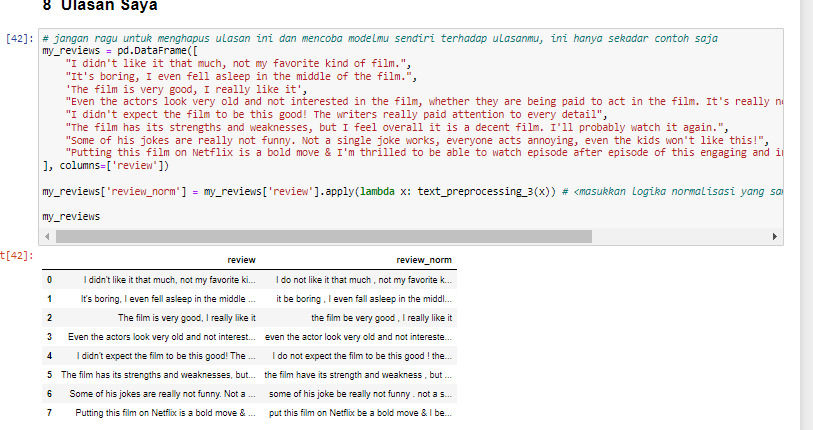
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

Kita akan membuat threshold untuk membagi review positif dan negatif, review positif jika threshold > 0.5, dan review negatif <0.5

### Model 1

In [ ]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(tfidf_vectorizer_1.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

review positif ada pada index [2,7] dan review negatif pada index [0,1,3,4,5,6], benar 6, salah 2

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Jelaskan temuanmu atas hasil evaluasi yang kamu dapatkan dari pengujian model

</div>

### Model 2

In [ ]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(tfidf_vectorizer_2.transform(texts.apply(lambda x: text_preprocessing_2(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

review positif ada pada index [5,7] dan review negatif pada index [0,1,2,3,4,6], 6 benar, 2 salah

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Jelaskan temuanmu atas hasil evaluasi yang kamu dapatkan dari pengujian model

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model 3

In [ ]:
texts = my_reviews['review_norm']

tfidf_vectorizer_3 = tfidf_vectorizer_2
my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_2(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

review positif ada pada index [0,2,3,4,5,7] dan review negatif pada index [1,6], benar 6, salah 2

Dengan membuat threshold 0.5, semua model membuat 6 jawaban benar, dan 2 jawaban salah. Meskipun indexnya berbeda-beda

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Jelaskan temuanmu atas hasil evaluasi yang kamu dapatkan dari pengujian model

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model 4 (Tidak bisa di runningkan di laptop saya)

In [ ]:
#texts = my_reviews['review_norm']

#my_reviews_features_4 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

#my_reviews_pred_prob = model_4.predict_proba(my_reviews_features_4)[:, 1]

#for i, review in enumerate(texts.str.slice(0, 100)):
    #print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Jelaskan temuanmu atas hasil evaluasi yang kamu dapatkan dari pengujian model

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Kesimpulan

- Kita memiliki dataset dengan total data 47331 baris dan 17 kolom
- train set dan test set memiliki rasio 50:50
- setiap tahun jumlah film dan reviewernya cenderung meningkat seiring dengan antusiasme dan teknologi yang berkembang
- rasio negatif dan positif review sekitar 50:50
- Model logisticregression dengan NLTK, TF-IDF memiliki nilai F1 yang jauh lebih baik dari dummy models
- Model logisticregression dengan spaCy, TF-IDF memiliki nilai F1 yang mirip dengan logisticregression NLTK, TF-IDF
- Model LightGBM dengan spaCy, TF-IDF memiliki skor F1 sedikit lebih rendah yakni 0.86
- Semua model jika kita menggunakan threshold 0.5 pada tahap 8 'ulasan saya' maka akan menghasilkan jawaban 6 benar, dan 2 salah meskipun indexnya berbeda-beda
- BERT tidak bisa di runningkan di laptop saya, sehingga tidak bisa kita buat modelnya

Pada tugas kali ini kita memutuskan untuk menggunakan model-1 logisticregression dengan NLTK, TF-IDF sebagai model untuk menentukan hasil review karena memiliki skor F1 yang paling baik yakni 0.88, dan tidak ada indikasi overfitting

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

# Daftar Periksa

- [x]  *Notebook* dibuka 
- [ ]  Data teks telah dimuat dan dilakukan pra-pemrosesan untuk vektorisasi 
- [ ]  Data teks telah diubah menjadi vektor 
- [ ]  Model telah terlatih dan diuji 
- [ ]  Ambang batas metrik tercapai 
- [ ]  Semua kode sel tersusun sesuai urutan eksekusinya 
- [ ]  Semua kode sel bisa dieksekusi tanpa *error* 
- [ ]  Terdapat kesimpulan 